![](WAZE.png)
# Waze User Churn Project: Results of EDA
Waze is a free navigation app that makes it easier for drivers around the world to get to where they want to go. Waze leadership wants to optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development. They would like an analysis of WAZE data to understand their users better and the development of a machine learning model that predicts user churn. (Churn is understood to be the number of users who have uninstalled the Waze app or stopped using it.) 

This project is part of a larger effort at Waze to increase growth. It assumes that high retention rates indicate satisfied users who repeatedly employ the Waze app over time. Identifying and predicting which users are likely to churn will allow the WAZE team to target such individuals to induce their retention, thereby allowing Waze to grow its business. 

**Data**    
Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users help make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. The data set is in-house from Waze for Cities (https://www.transportation.gov/office-policy/transportation-policy/faq-waze-data).

**Deliverables**   
(Since this is an exercise, all models are predetermined.)
* I.	An analysis of WAZE data to understand their users better
* II.	The development of a machine learning model that predicts user churn
    * a.	a binomial logistic regression model
    * b.	a winning tree-based model
* Appendix: A 2 sample t-test based on a sample of user data determining if there is a statistically significant difference in the mean number of rides between iPhone® users and Android™ users

In [1]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Import packages for evaluation and testing (confusion matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# Set Jupyter to display all of the columns (no redaction)
pd.set_option('display.max_columns', None)

# Suppress warnings
import warnings

In [2]:
# Import data; create dfd
df0 = pd.read_csv('waze_dataset_transformed.csv', on_bad_lines='skip')
df0.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0.953670,0.130381,138.360267,11.632058,79.430298
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0.406856,0.266854,1246.901868,128.186173,260.389902
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.841186,0.051121,382.393602,32.201567,113.953460
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0.724968,4.505948,304.530374,22.839778,93.351141
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0.499266,0.107713,219.455667,58.091206,194.342970


# PART IIa: Binomial logistic regression model based on multiple variables.
WAZE is interested in learning whether the probability of churn can be estimated using the data set (churn/retention).
A binomial logistic model (rather than linear) is appropriate. Binomial logistic regression is a statistical technique that models the probability of an event (churn) based on one (or more) independent variables. The outcome must be a binary classification: churn or retention. 

In order to decide on/verify a regression model, it is necessary to review the df, noticing particularly what types of data it contains. Other actions performed are: looking for correlations, missing data, potential outliers, and/or duplicates. Outliers can be particularly harmful to regression models, so such rows should be dropped or dealt with by substituting extreme values with dataset means or medians. New features and visualizations are also a key part of EDA.

In order to confirm that a binomial regression model is best, first a review of the df must be performed:
* missing data
* potential outliers
  * regression models are sensitive to outliers, so should be dropped or replaced with medians or means
* duplicates - this was covered in PART I: EDA
* looking for correlations
  
Also, creation of professional driver feature to contain the super user category

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   label                                14299 non-null  object 
 1   sessions                             14999 non-null  int64  
 2   drives                               14999 non-null  int64  
 3   total_sessions                       14999 non-null  float64
 4   n_days_after_onboarding              14999 non-null  int64  
 5   total_navigations_fav1               14999 non-null  int64  
 6   total_navigations_fav2               14999 non-null  int64  
 7   driven_km_drives                     14999 non-null  float64
 8   duration_minutes_drives              14999 non-null  float64
 9   activity_days                        14999 non-null  int64  
 10  driving_days                         14999 non-null  int64  
 11  device                      

In [4]:
df0.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,0.449255,0.338698,578.963113,232.817946,190.394608
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.286919,1.314333,1030.094384,620.622351,334.674026
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000298,0.000000,0.000000,72.013095
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,0.196221,0.051037,136.238895,32.424301,90.706222
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,0.423097,0.100775,272.889272,72.854343,122.382022
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,0.687216,0.216269,558.686918,179.347527,193.130119
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.530637,39.763874,15420.234110,15777.426560,23642.920871


## EDA and transformations
* Initial df transformations: dropping rows and/or columns
* Gather further statistics: creation of features and/or visualizations

In [5]:
# Check for missing values
df0.isna().sum()

label                                  700
sessions                                 0
drives                                   0
total_sessions                           0
n_days_after_onboarding                  0
total_navigations_fav1                   0
total_navigations_fav2                   0
driven_km_drives                         0
duration_minutes_drives                  0
activity_days                            0
driving_days                             0
device                                   0
percent_sessions_in_month                0
total_sessions_per_day                   0
kms_driven_per_day_during_the_month      0
km_per_drive                             0
km_per_hour                              0
dtype: int64

In [6]:
# Drop rows with missing data in `label` column
df = df0.dropna()

# Check that it worked
df.isna().sum()

label                                  0
sessions                               0
drives                                 0
total_sessions                         0
n_days_after_onboarding                0
total_navigations_fav1                 0
total_navigations_fav2                 0
driven_km_drives                       0
duration_minutes_drives                0
activity_days                          0
driving_days                           0
device                                 0
percent_sessions_in_month              0
total_sessions_per_day                 0
kms_driven_per_day_during_the_month    0
km_per_drive                           0
km_per_hour                            0
dtype: int64

#### Create feature professional driver
professional driver: users who had either 240 or more drives (8 per day) OR drove over 6000 kms (~ 3728 miles) in the last month (200 kms or 124 miles per day) or did not

In [7]:
# Supress slice warnings
warnings.filterwarnings('ignore')

# Professional driver feature
df['professional_driver'] = np.where((df['drives'] >= 200) | (df['driven_km_drives'] >= 6000), 1, 0) # np.where() 1 = true and 0 = false 
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour,professional_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0.953670,0.130381,138.360267,11.632058,79.430298,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0.406856,0.266854,1246.901868,128.186173,260.389902,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.841186,0.051121,382.393602,32.201567,113.953460,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0.724968,4.505948,304.530374,22.839778,93.351141,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0.499266,0.107713,219.455667,58.091206,194.342970,0


In [8]:
# Check count and % of professionals and non-professionals
print(df['professional_driver'].value_counts())
print(df['professional_driver'].value_counts(normalize = True))

professional_driver
0    11034
1     3265
Name: count, dtype: int64
professional_driver
0    0.771662
1    0.228338
Name: proportion, dtype: float64


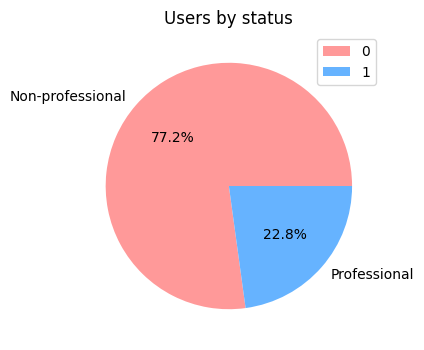

In [9]:
# Create pie chart for label category
fig = plt.figure(figsize=(4, 4))
data = df['professional_driver'].value_counts()
labels = ['Non-professional', 'Professional']# Custom labels aligned with index 0 and 1
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.legend(data.index, loc="best")  # Add a legend with the actual data index
plt.title('Users by status')
plt.show();

In [10]:
# Calculate median values of all columns for professional_driver vs regular user
df.groupby('professional_driver').median(numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour
professional_driver,,,,,,,,,,,,,,,
0,52.5,45.0,150.602696,1743.0,71.0,9.0,2974.961746,1290.598506,16.0,12.0,0.402423,0.094710,220.587879,63.889668,118.617250
1,76.0,65.0,192.505390,1757.0,72.0,9.0,7118.493005,2803.687177,16.0,12.0,0.513353,0.123138,518.680323,119.472956,135.994944


In [11]:
# Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize = True)

professional_driver  label   
0                    retained    0.825902
                     churned     0.174098
1                    retained    0.811639
                     churned     0.188361
Name: proportion, dtype: float64

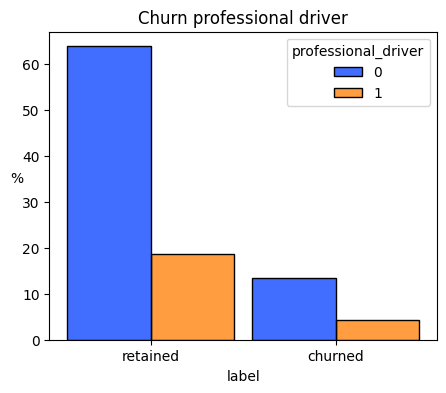

In [12]:
# Plot professional_driver-label histogram
plt.figure(figsize=(5,4)) 
sns.histplot(data=df, 
             x='label', 
             hue='professional_driver', 
             palette='bright', 
             multiple='dodge', 
             shrink=0.9, 
             stat='percent')
plt.ylabel('%', rotation=0)
plt.title('Churn professional driver');

Results    
There is only a negligible difference between the percentages of "professional drivers" and non-professionals who fall into the churned or retained user category.

The median professional driver class doesn't differ much from non-professional class users in their retention levels, use of fav navigations, activity, and driving days. They did, however, have 24 more sessions per month, took 20 more drives, drove approximately 4,000 more kilometers (~ 2485 miles), and spent 25 hours more on the road. 

With this said, their incredible distance and time spent driving will affect the regression. Also, some of the outliers residing within the category are likely not possible.

In [13]:
# See if the removal of NA rows affected the outlier issues
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,0.449837,0.338207,581.942399,232.269197,190.730963,0.228338
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,0.286863,1.319814,1038.254509,616.197409,339.926138,0.419776
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000298,0.000000,0.000000,72.013095,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,0.196890,0.050818,136.168003,32.486524,90.649402,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,0.424310,0.100457,273.301012,72.947059,122.105845,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,0.687251,0.215210,558.018761,179.347527,193.238449,0.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.530637,39.763874,15420.234110,15777.426560,23642.920871,1.000000


#### Outliers
As determined from the EDA (PART I), many variables have outliers. Regression models cannot handle outliers, so these have to be dealt with.   
These outliers do not seem to be data entry errors (but for a few); they are present because of the right-skewed distributions.   
Dropping the missing label values did not solve the outlier situation. Now, in order not to delete additional data stored within the observations, more reasonable values will be imputed into outlying data. All exceeding values will be changed to the 95th percentile of each column.   

In [14]:
print(df.shape)
df.columns

(14299, 18)


Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'percent_sessions_in_month',
       'total_sessions_per_day', 'kms_driven_per_day_during_the_month',
       'km_per_drive', 'km_per_hour', 'professional_driver'],
      dtype='object')

In [15]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'percent_sessions_in_month',
       'total_sessions_per_day', 'kms_driven_per_day_during_the_month',
       'km_per_drive', 'km_per_hour']:
    percentile95 = df[column].quantile(0.95)
    df.loc[df[column] > percentile95, column] = percentile95

In [16]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,0.448226,0.203300,484.488544,168.147169,165.698737,0.228338
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,0.283954,0.267737,570.872328,232.903899,110.185653,0.419776
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000298,0.000000,0.000000,72.013095,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,0.196890,0.050818,136.168003,32.486524,90.649402,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,0.424310,0.100457,273.301012,72.947059,122.105845,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,0.687251,0.215210,558.018761,179.347527,193.238449,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,0.936313,1.089743,2258.494484,913.878779,488.824224,1.000000


In [17]:
df.dtypes

label                                   object
sessions                                 int64
drives                                   int64
total_sessions                         float64
n_days_after_onboarding                  int64
total_navigations_fav1                   int64
total_navigations_fav2                   int64
driven_km_drives                       float64
duration_minutes_drives                float64
activity_days                            int64
driving_days                             int64
device                                  object
percent_sessions_in_month              float64
total_sessions_per_day                 float64
kms_driven_per_day_during_the_month    float64
km_per_drive                           float64
km_per_hour                            float64
professional_driver                      int64
dtype: object

#### Feature transformation
* encode two categorical variables:
  * target variable 'label'
  * device

In [18]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [19]:
# Create binary `device2` column
df['device2'] = np.where(df['device']=='iPhone', 1, 0)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [20]:
# Create new csv file for modified df
df.to_csv('WAZE_dataset_transformed_2.csv', index=False)
df = pd.read_csv('WAZE_dataset_transformed_2.csv')
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour,professional_driver,label2,device2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0.936313,0.130381,138.360267,11.632058,79.430298,1,0,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,0.406856,0.266854,1246.901868,128.186173,260.389902,1,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.841186,0.051121,382.393602,32.201567,113.953460,0,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0.724968,1.089743,304.530374,22.839778,93.351141,0,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0.499266,0.107713,219.455667,58.091206,194.342970,0,0,0


In [21]:
print(df.shape)
df.columns

(14299, 20)


Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'percent_sessions_in_month',
       'total_sessions_per_day', 'kms_driven_per_day_during_the_month',
       'km_per_drive', 'km_per_hour', 'professional_driver', 'label2',
       'device2'],
      dtype='object')

Data transformations stored in 'waze_dataset_transformed_2.csv'
* Added columns:
  * `professional_driver`: binary yes (1)/ no (0)
  * `label2`:  binary churned (1)/ retained (0)
  * `device2`:  binary iPhone (1)/ Android (0)

### Check data for modelling
Determine whether assumptions have been met for logistic regression:
* independent observations: this is assumed
* no extreme outliers: addressed above
* little to no multicollinearity among X predictors (Pearson correlation coefficient matrix)
* linear relationship between X and the logit of y: after modelling

#### Collinearity
Generate a Pearson correlation coefficient matrix

In [22]:
# Generate a Pearson correlation coefficient matrix
correlation_matrix = df.corr(method="pearson", numeric_only=True)

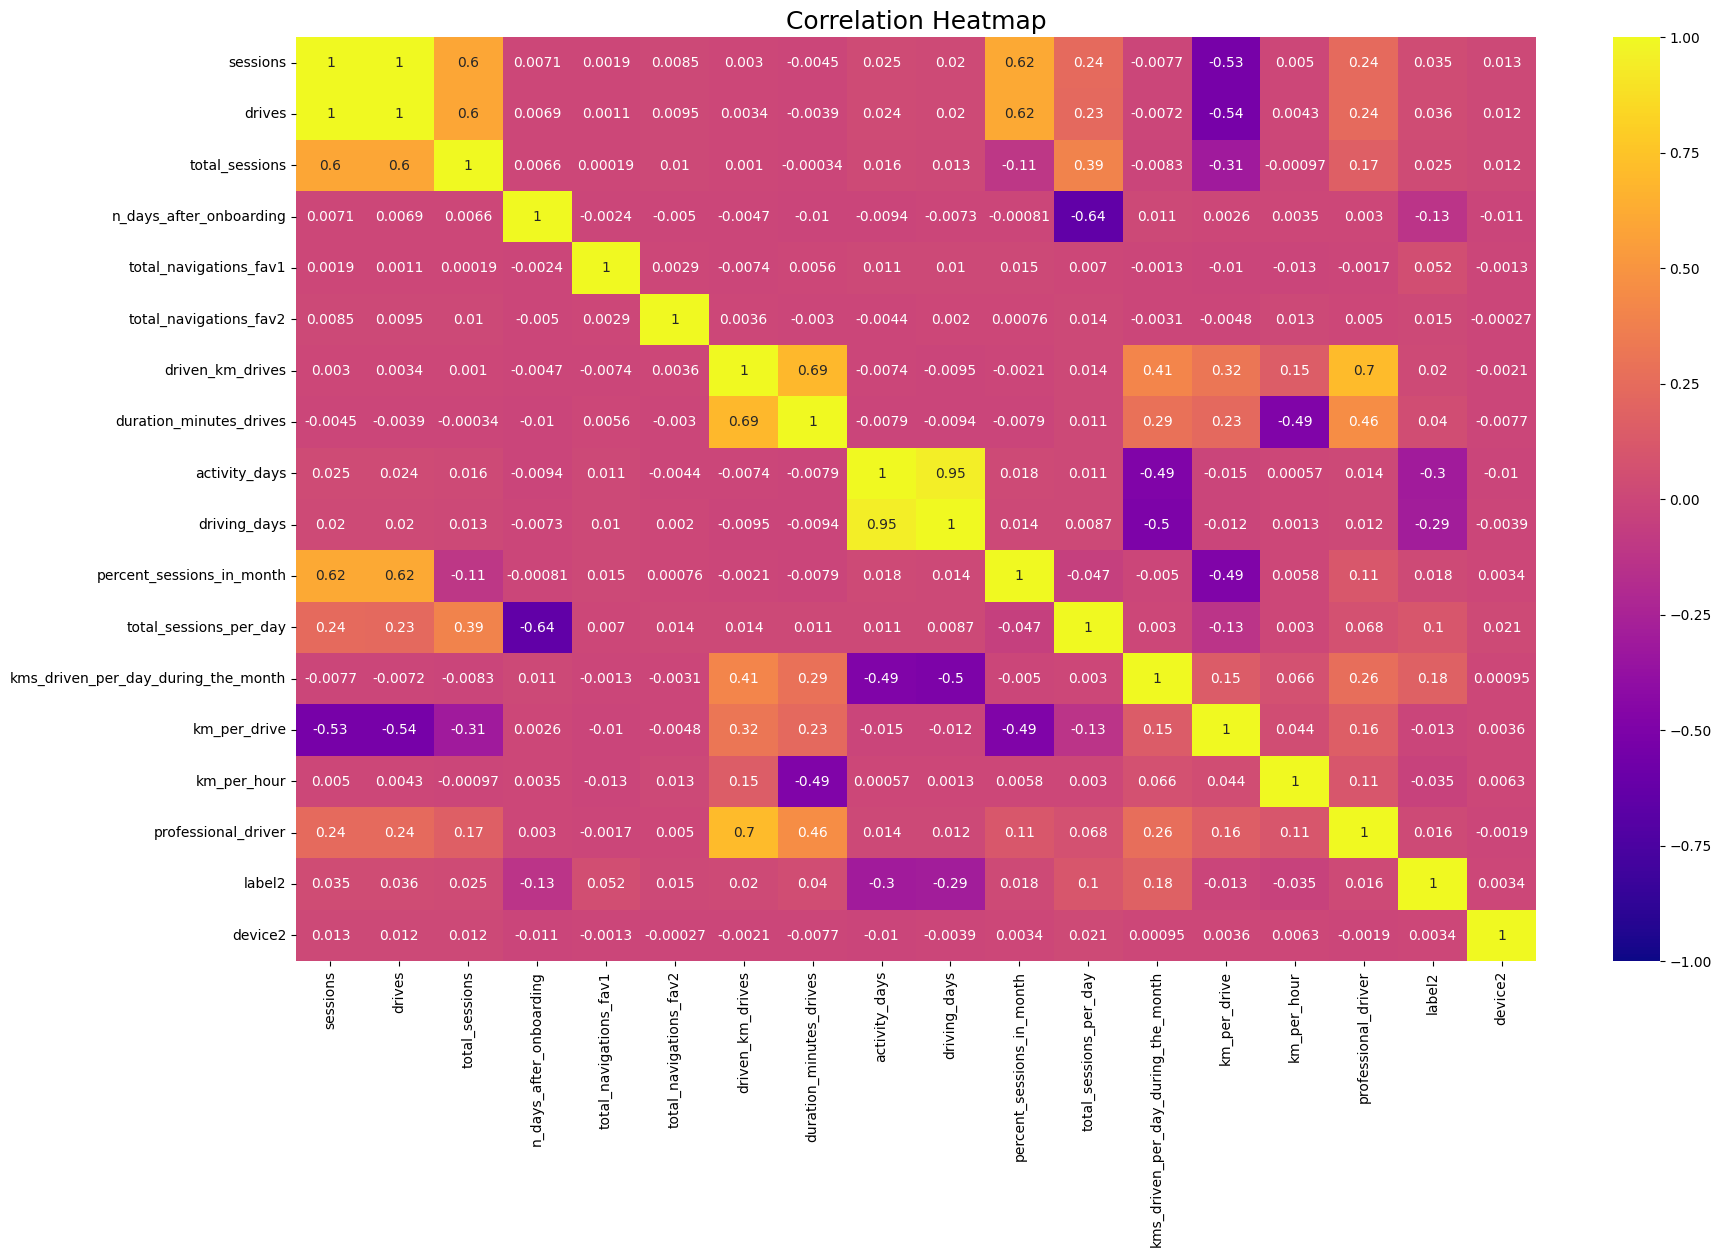

In [23]:
# Plot correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='plasma')
plt.title('Correlation Heatmap',
          fontsize=18)
plt.show();

A Pearson correlation coefficient value > the absolute value of 0.7, are strongly multicollinear variables and only one of these variables should be used.

Not too many variables show strong multicollinearity: 
* 1.00: `'sessions'` AND 'drives'
* 0.95: 'activity_days' AND `'driving_days'`
* 0.70: `'driven_km_drives'` AND 'professional_driver
* 0.69: 'duration_minutes_drives' AND `'driven_km_drives'`
* 0.62: 'percent_sessions_in_month'  AND  `'sessions'` and 'drives'
* 0.60: 'total_sessions' AND  `'sessions'` and  'drives'


To be removed from X variables:
* for multicollinearity: `'sessions'`, `'driving_days'`, and `'driven_km_drives'`
* these are the target: `'label'` and `'label2'`
* categorical variable: `'device'`

### Prepare data for modelling
* Split the data into:
  * features and target variable
  * training data(75%) and test data(25%)
  * stratify, because data set is imbalanced
  * set a random seed so work can be reproduced (42)

In [24]:
# Subset independent X and dependent y
# Isolate predictor variables by dropping problematic variables (collinear, categorical, and target)
X = df.drop(columns = ['sessions', 'driving_days', 'driven_km_drives', 'label', 'label2', 'device'])

# Isolate target variable
y = df['label2']

In [25]:
# Display balance of dependent y variable and verify is binary as required for a logistic regression
y.value_counts(normalize=True)

label2
0    0.822645
1    0.177355
Name: proportion, dtype: float64

In [26]:
#check variables
print("X")
print(X.info())
print("y")
print(y.info())

X
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   drives                               14299 non-null  int64  
 1   total_sessions                       14299 non-null  float64
 2   n_days_after_onboarding              14299 non-null  int64  
 3   total_navigations_fav1               14299 non-null  int64  
 4   total_navigations_fav2               14299 non-null  int64  
 5   duration_minutes_drives              14299 non-null  float64
 6   activity_days                        14299 non-null  int64  
 7   percent_sessions_in_month            14299 non-null  float64
 8   total_sessions_per_day               14299 non-null  float64
 9   kms_driven_per_day_during_the_month  14299 non-null  float64
 10  km_per_drive                         14299 non-null  float64
 11  km_per_hour               

In [27]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # stratify=y because df is unbalanced

In [28]:
# Check X_train df
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10724, 14)
(3575, 14)
(10724,)
(3575,)


In [29]:
# Check balance of training set
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

label2
0    8822
1    1902
Name: count, dtype: int64
label2
0    0.822641
1    0.177359
Name: proportion, dtype: float64


In [30]:
# Check balance of test set
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

label2
0    2941
1     634
Name: count, dtype: int64
label2
0    0.822657
1    0.177343
Name: proportion, dtype: float64


## Build Model and plot logistic regression classification model
* instantiate model
* fit model
* get coefficients (parameter and intercept [betas]) for regplots   
(The coefficients represent the change in the log odds of the target variable(y) for every 1 unit increase in X. If the estimated β1 is 0.0019 that means a 1 unit increase in drives is associated with a 0.0019 increase in the log odds of p.)

In [31]:
# Instantiate and fit the model
log_clf = LogisticRegression(random_state=42, penalty=None, max_iter=400).fit(X_train, y_train) # penalty = None because predictor X variables are unscaled


In [32]:
# Get coefficients 
print(log_clf.coef_)
print('intercept', log_clf.intercept_)

[[ 2.20704302e-03  3.29473285e-04 -3.97613188e-04  1.25555270e-03
   1.01391353e-03  4.89265046e-05 -1.03621232e-01  2.79194623e-04
   2.46641939e-02  8.66621051e-05  1.35394815e-04 -7.15292387e-04
   9.54849604e-03  3.01246489e-02]]
intercept [0.00558166]


In [33]:
# Create attractive list
pd.Series(log_clf.coef_[0], index=X.columns)

drives                                 0.002207
total_sessions                         0.000329
n_days_after_onboarding               -0.000398
total_navigations_fav1                 0.001256
total_navigations_fav2                 0.001014
duration_minutes_drives                0.000049
activity_days                         -0.103621
percent_sessions_in_month              0.000279
total_sessions_per_day                 0.024664
kms_driven_per_day_during_the_month    0.000087
km_per_drive                           0.000135
km_per_hour                           -0.000715
professional_driver                    0.009548
device2                                0.030125
dtype: float64

#### Create regplots to check for log-odds (probabilities) linearity
* create new variable training_probabilities
  * call predict_proba() to generate the probability of response for each sample in the training data (the model’s 1st test at predicting properly)
  * result is a 2-D array where each row represents a user in X_train
      * 1st column is the probability of the user not churning
      * 2nd column is the probability of the user churning
* create new variable logit in the logit_data dataframe which represents the logit for each user

In [34]:
# Get the predicted probabilities of the training data
training_probabilities = log_clf.predict_proba(X_train)
training_probabilities

array([[0.93854827, 0.06145173],
       [0.57529733, 0.42470267],
       [0.76335021, 0.23664979],
       ...,
       [0.9196548 , 0.0803452 ],
       [0.83408984, 0.16591016],
       [0.93574612, 0.06425388]])

In [35]:
# Copy X_train and assign to logit_data
logit_data = X_train.copy()

# Create a new `logit` variable in `logit_data` df which represent the logit (% chance) for each user
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]  # np.log(ARRAY) will compute log(x) 
                                     # np.log(x) calculates natural logarithm of a given input; how close the odds of X go to either 1 or 0
                                                               

#### Regplots
Plot for each continuous or discrete predictor variable to check for linearity of logit.    
Where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities    
plot each continuous and discrete predictor variable:

* discrete (int64): `activity_days`, `drives`, `n_days_after_onboarding`, `total_navigations_fav1`, `total_navigations_fav2`
  * (The binary variables `device2` & `professional_driver` will not be plotted)
* continuous (float64): `total_sessions`, `duration_minutes_drives`, `percent_sessions_in_month`, `total_sessions_per_day`, `kms_driven_per_day_during_the_month`, `km_per_drive`, `km_per_hour`

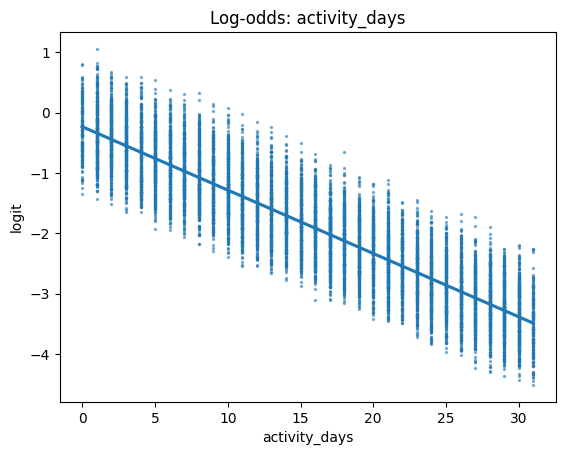

In [36]:
# Plot the discrete variable 'activity_days' log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

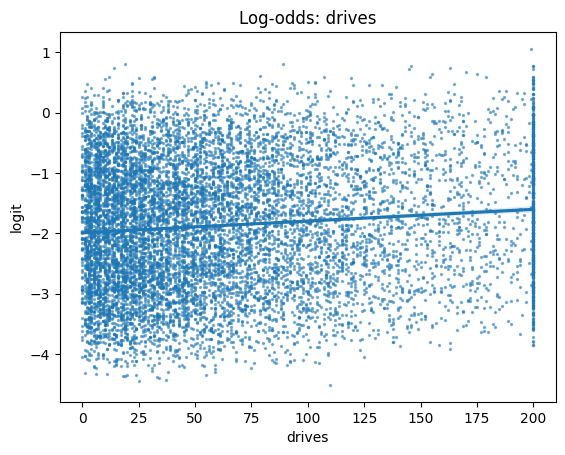

In [37]:
sns.regplot(x='drives', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: drives');

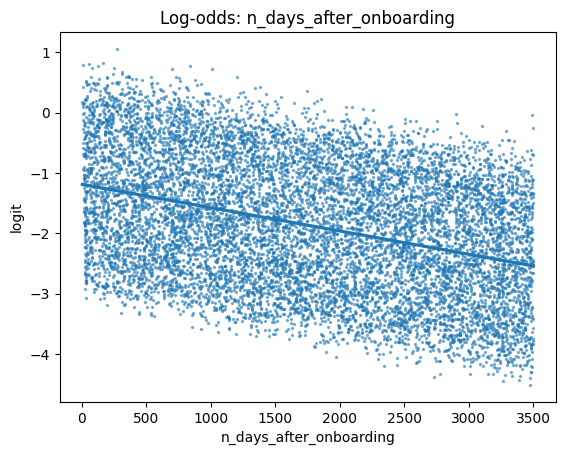

In [38]:
sns.regplot(x='n_days_after_onboarding', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: n_days_after_onboarding');

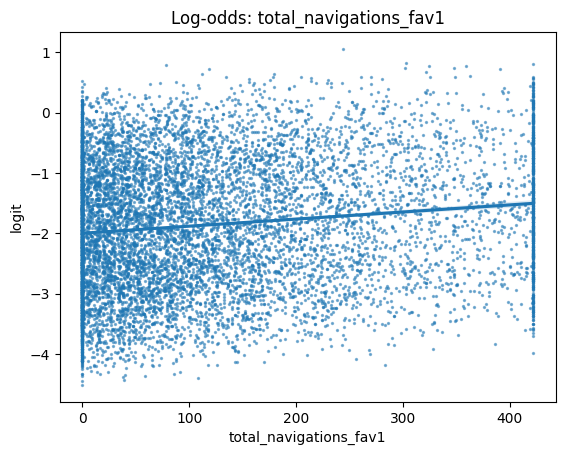

In [39]:
sns.regplot(x='total_navigations_fav1', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: total_navigations_fav1');

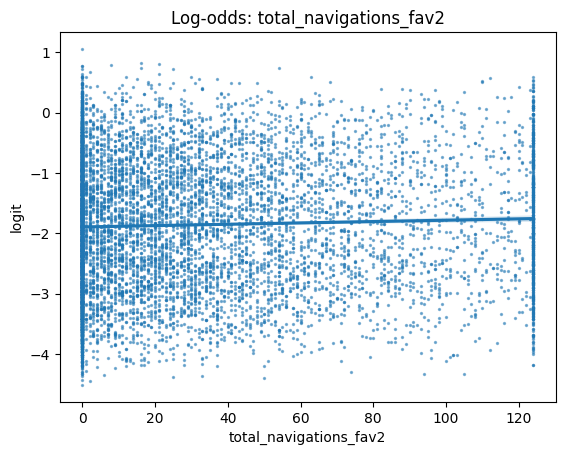

In [40]:
sns.regplot(x='total_navigations_fav2', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: total_navigations_fav2');

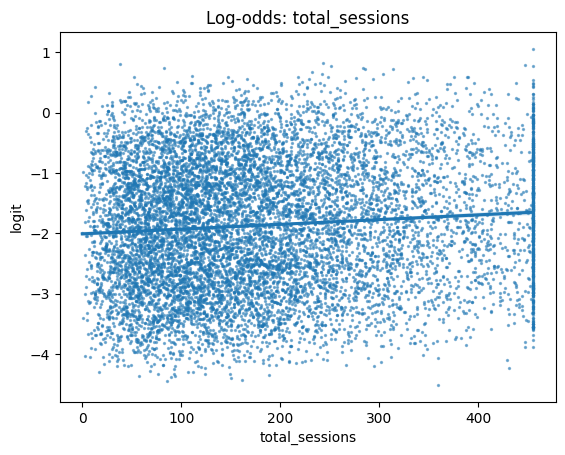

In [41]:
sns.regplot(x='total_sessions', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: total_sessions');

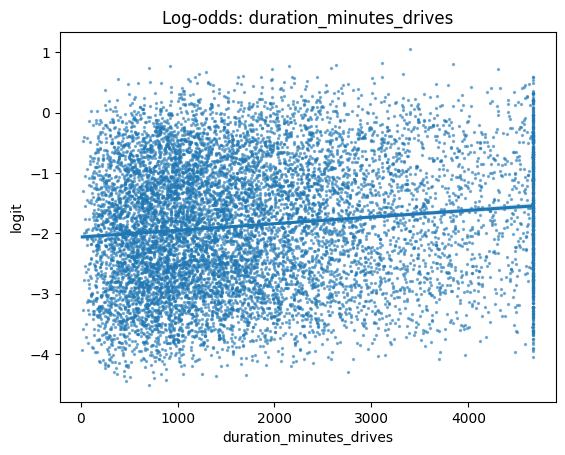

In [42]:
sns.regplot(x='duration_minutes_drives', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: duration_minutes_drives');

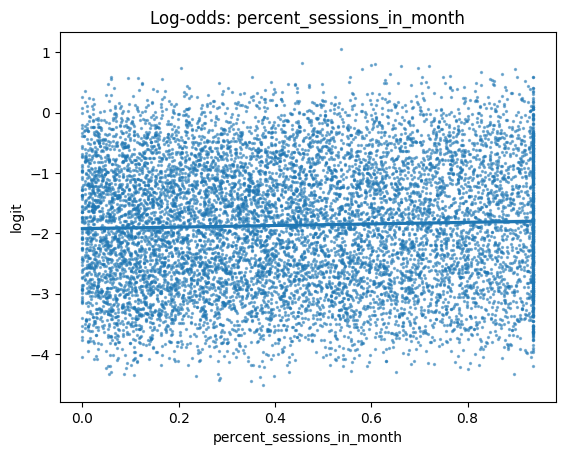

In [43]:
sns.regplot(x='percent_sessions_in_month', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: percent_sessions_in_month');

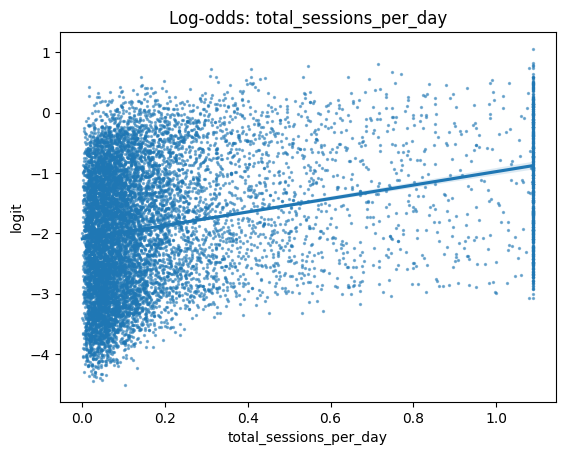

In [44]:
sns.regplot(x='total_sessions_per_day', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: total_sessions_per_day');

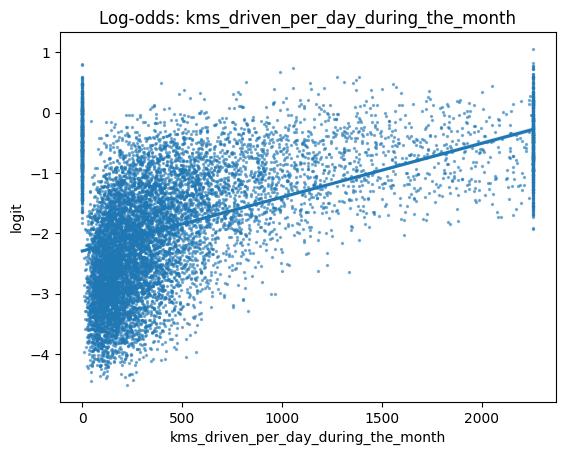

In [45]:
sns.regplot(x='kms_driven_per_day_during_the_month', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: kms_driven_per_day_during_the_month');

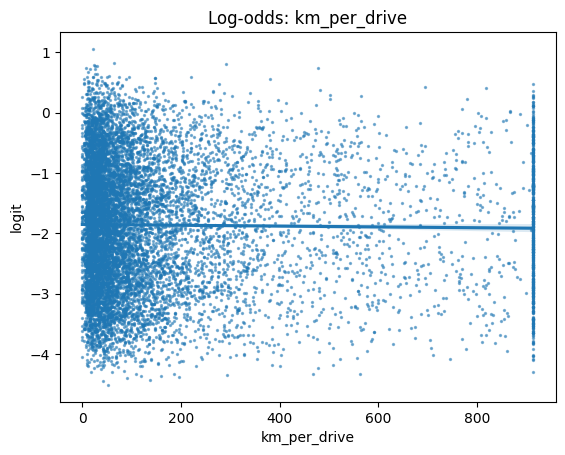

In [46]:
sns.regplot(x='km_per_drive', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: km_per_drive');

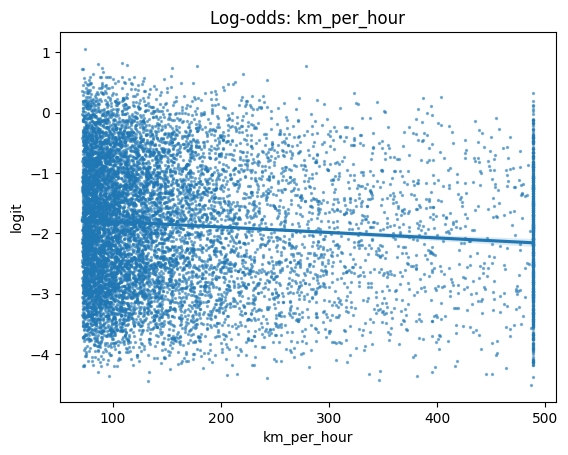

In [47]:
sns.regplot(x='km_per_hour', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: km_per_hour');

Results      
All show linearity   
linearity: points on the plot appear to fall along a straight line. If they do not, then model does not fit the data well.

## Results and evaluation
* get predictions on testing data – because not carrying forward
* get metrics: accuracy, precision, recall, and F1 score
* create confusion matrix
* create ROC curve
* create AUC

In [48]:
# Generate and save predictions X_test
y_preds = log_clf.predict(X_test)

In [49]:
# Score the model (accuracy) on the test data
log_clf.score(X_test, y_test)

0.8248951048951049

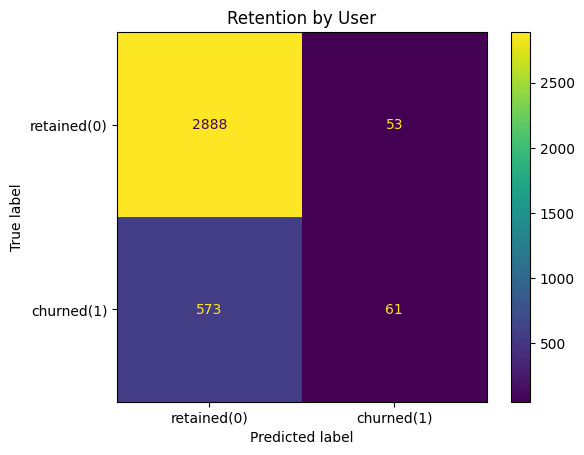

In [50]:
# Create confusion matrix to visualize how accurate classifier is at predicting the labels for a categorical variable
log_cm = confusion_matrix(y_test, y_preds)

# Visualize confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels=['retained(0)', 'churned(1)'])

log_disp.plot()
plt.title('Retention by User');

*Legend*
* True label (y_test): actual labels of the holdout sample
* Predicted label (y_pred): predicted labels (retained/churned) on the holdout test sample

Since this is a binomial logistic regression, there are only two labels:
* 0 = the person was labeled as retained for that observation
* 1 = a person was labeled as churned for that observation

*Translation*<br>
`True negatives`(UL): # of people that were retained(0) that the model accurately predicted as retained(0) = 2888   
`True positives`(LR): # of people that churned(1) that the model accurately predicted churned(1) = 61   
`False positives`(UR)/ Type I Errors: # of people that were retained(0) that the model inaccurately predicted churned(1) = 53   
`False negatives`(LL)/Type II Errors: # of people that churned(1) that the model inaccurately predicted were retained(0) = 573   

Immediately seen from the model is a high proportion of `False positives`(UR) or Type I Errors where the model incorrectly predicted when a person would churn. 
There is also a less than stellar proportion of `False negatives` or Type II Errors, where the model predicated a user would be retained, but they churned.    

In [51]:
# Create table of results for metrics
models_table = pd.DataFrame({'Model': ['Logistic Regression'],
                      'Precision': ['%.6f' % precision_score(y_test, y_preds)],
                      'Recall': ['%.6f' % recall_score(y_test, y_preds)],
                      'Accuracy': ['%.6f' % accuracy_score(y_test, y_preds)],
                      'F1': ['%.6f' % f1_score(y_test, y_preds)]
                     },)
models_table

,Model,Precision,Recall,Accuracy,F1
0,Logistic Regression,0.535088,0.096215,0.824895,0.163102


In [52]:
# Save results table as csv
models_table.to_csv('Retention_Results.csv', index = False) # index = False to remove indexing row

In [53]:
# View the results
table = pd.read_csv('Retention_Results.csv')
table.head()

,Model,Precision,Recall,Accuracy,F1
0,Logistic Regression,0.535088,0.096215,0.824895,0.163102


In [54]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test,  y_preds, target_names = target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.54      0.10      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Precision** measures the % of customers that churned(1) out of all the customers that have been predicted to churn(1) 
* (# true positives(61) / (# true positives(61) + # false positives(53))

*The good*   
This model has a precision score of 0.5350, thus it is middling at precisely predicting whether a user will churn(1) (true positives), based on the variables. In an effort to be precise, the model also attempts to reduce the occurrences of incorrectly classifying users as churning(1) when they will stay(0) (false positives/Type I errors).

*The bad*   
In its goal to be precise (not classify people as churned(1) when they are retained(0), the algorithm can become more selective. A higher rate of precision may mean that more samples are classified as retained(0), when they churn(1) (false-negative/Type II errors). Thus, users set to churn(1) can be missed.

The conclusion:
Because WAZE is interested in learning if a customer would churn(1) based on the variables available, a ~ 53% precision is not great. 

**Recall** measures the % of churned(1) customers that the classifier correctly identified as churned(1) out of all churned(1) observations in the test set (3575). 
* (# true positives(61) / (# true positives(61) + # false negatives(573))

*The good*      
This model has a recall score of 0.0962, thus it is not good at correctly identifying whether a user churned(1), based on the available variables, out of all users who were tagged as churned(1) (y_test = 3575 [2941 + 634]). The model is also less likely to miss people who are churned(1) (to incorrectly classify people as retained(0) who churned(1)(false-negative/Type II errors)).

*The bad*   
However, because the model is more sensitive to finding churned(1) people, it can be prone to incorrectly categorizing people as churned(1) (false-positives/Type-I error) when they are retained(0). Clearly, it did not do this.

The conclusion: the model should be tuned to for recall to perform better at correctly identifying whether a user churned(1).

**Accuracy** is the percentage of data points that were correctly classified out of all total predictions. 
* (# true positives(61) + # true negatives(2888) / # total predictions(3575))

*The good*    
The model achieved an accuracy score of 0.8248 which is quite good.

*The bad*    
Accuracy can be misleading if the data set is unbalanced, as this one is. The algorithm could be poor at balancing false positive and false negatives because it does not account for the distribution of classes (churned/retained). It could be excellent at predicting one class (e.g., the majority[retained]) and being terrible at predicting the other (e.g., the minority[churned]) and return a very good accuracy score.

The conclusion: since this class was  unbalanced (634(1)/ 2941(0)), this accuracy of 0.825 hides the reality that it isn't good at identifying churned(1) users. 

**F1 Score** (the harmonic mean) balances precision (minimizing false positives or Type I errors) and recall (minimizing false negatives or Type II errors) performance, providing a single value for evaluation.

The conclusion
The combined F1 score of 0.1631 reveals the models deficiencies in identifying churned(1) users. 

#### Plot ROC and AOC
Visualize the performance of the logistic regression classifier

**ROC curve (receiver operating characteristic curve)**
* A ROC curse visualizes the performance of a classifier at different classification thresholds
* For binary classification: a classification threshold is a cutoff(point) for differentiating the positive class from the negative class
* y axis: True Positive Rate (Recall). The probability that model predicts a positive and it is negative (Sensitivity).
* X axis: False Positive Rate (= False Positives / (False Positives + True Negatives)). The probability that model predicts a negative and it is negative (Specificity)

**AUC (area under the ROC curve)**
* The AUC score provides an aggregate measure of performance of the model at each threshold.

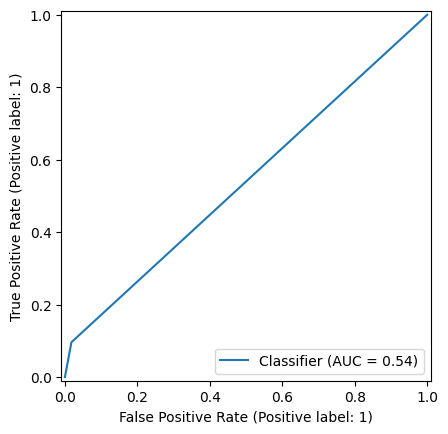

In [55]:
# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show()

In [56]:
# Compute the AUC
roc_auc_score(y_test,y_preds)

0.5390967148880668

*ROC curve*   
The graph shows of pairs (true positive/false positive) across all possible classification thresholds (classification decisions) and confirms that the model is only middling at classifying the data as the False Positive Rate continues to increase steeply.

In the context of classification models, "across all possible classification thresholds" refers to the range of values that can be used to determine whether a sample is classified as belonging to a particular class (e.g., positive or negative).

*AUC scores*    
A model that has an AUC score of 0.0 is entirely wrong
A model that has an AUC score of 1.0 is entirely correct    
A model that has an AUC score of < 0.5 is a model that performs worse than random classification   
A model that has an AUC score of > 0.5 is a model that performs better than random classification

This model has an AUC score of ~54%, which suggests that the model has better overall performance (over all possible classification thresholds) in distinguishing between positive and negative classes.

The AUC evaluates the model's ability to discriminate between positive and negative instances across various thresholds.

# Preliminary conclusions (see report for final summary)
In preparation of the data, a new feature `professional driver` was created as suggested in the previous report. Users who had either 240 or more drives or who drove over 6000 kms, approximately 3728 miles in the last month, were classified as professional drivers. These drivers would have taken at least 8 drives per day or driven roughly 200 kms, 124 miles per day.   

Using these metrics, out of the 14,999 WAZE users, roughly 23% qualify as professional drivers. This amounts to 3,265 users of the app.
The median professional driver class doesn't differ much from non-professional class users in their retention levels, use of fav navigations, activity, and driving days. They did, however, have 24 more sessions per month, took 20 more drives, drove approximately 4,000 more kilometers (~ 2485 miles), and spent 25 hours more on the road.     

There was also little difference between the percentages of profession drivers who churned and non-professional drivers. About 17% of non-professional users churned out of all non-professional drivers and 19% of those classified as professional drivers churned out of all users classified as professional.

#### Results of binomial logistic regression 
This model used the binary variable `label`, which classified users as either churned or retained, as the dependent variable. Of all users, only about 18% churned (2536), while the remaining 82% (11763) remained loyal to the app.

After checking for correlations between the remaining variables in the data set by generating a Pearson correlation coefficient matrix and checking for linearity of the probabilities with regplots, twelve variables were selected for the regression model. These contained data such as time and distance spent on the road, number of times the app was opened, total sessions, and use of the app’s favorite navigations feature.

*Test data*      
Out of the 3575 users in the test data sample, 634 churned. Of those, the model captured 61 and missed 573. 
Since the goal of this project is to identify whether a user would churn using the available variables, this model’s performance is less than stellar. Although it had a near 82% Accuracy rating, its Recall score was 10% with a Precision score of 54%. Because Accuracy is the percentage of correct predictions out of all classifications, included in the score is the model’s far better performance at predicting users who would remain with the app. 

Accuracy can be misleading if the data set is unbalanced as this one is because it does not account for the distribution of classes (churned/retained). The model could be excellent at predicting one class (e.g., the majority[retained]) and terrible at predicting the other (e.g., the minority[churned]) yet still return a very good accuracy score. This lack of balance is revealed in the model’s f1 score of 16%. The f1 score is the harmonic mean, balancing precision and recall.

### Further steps/considerations
* Build, evaluate, and test two decision tree models: random forest and XGBoost
  * Refit models to recall
  * Consider optimal threshold 
* Perform a hypothesis test on the new feature `professional driver` to determine if there is a statistically significant difference in the mean number of rides taken between user classes. Perhaps a campaign targeted toward this class of user would be useful.
* Consider rebuilding logistic regression model with scaled data
